<a href="https://colab.research.google.com/github/flohmannjr/pytorch_learning/blob/main/PyTorch_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch for Deep Learning & Machine Learning - Full Course - freeCodeCamp.org
https://youtu.be/V_xro1bcAuA

In [33]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import torch

from torch import nn

In [34]:
torch.__version__

'1.13.1+cu116'

# Configs

In [35]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['figure.dpi'] = 100

plt.style.use('seaborn-darkgrid')

SEED = 4096

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# Functions

In [36]:
def get_lim(lim=[0, 1], test=[0, 1]):
    return (min(min(lim), min(test)), max(max(lim), max(test)))

def plot_data(X_train=[], y_train=[],
              X_test=[], y_test=[],
              X_pred=[], y_pred=[]):

    padding = 0.05

    xlim = get_lim()
    ylim = get_lim()

    legend_base = 0.995

    if(len(X_train) > 0):

        X_train = X_train.squeeze()
        y_train = y_train.squeeze()

        sns.scatterplot(x=X_train, y=y_train, size=1, legend=False, label='Train')

        xlim = get_lim(xlim, X_train)
        ylim = get_lim(ylim, y_train)

        legend_base -= 0.06

    if(len(X_test) > 0):

        X_test = X_test.squeeze()
        y_test = y_test.squeeze()

        sns.scatterplot(x=X_test, y=y_test, size=1, legend=False, label='Test')

        xlim = get_lim(xlim, X_test)
        ylim = get_lim(ylim, y_test)

        legend_base -= 0.06

    if(len(X_pred) > 0):

        X_pred = X_pred.squeeze()
        y_pred = y_pred.squeeze()

        sns.scatterplot(x=X_pred, y=y_pred, size=1, legend=False, label='Pred')

        xlim = get_lim(xlim, X_pred)
        ylim = get_lim(ylim, y_pred)

        legend_base -= 0.06

    plt.xlim(xlim[0] - padding, xlim[1] + padding)
    plt.ylim(ylim[0] - padding, ylim[1] + padding)

    plt.xticks(ticks=np.linspace(xlim[0], xlim[1], 11))
    plt.yticks(ticks=np.linspace(ylim[0], ylim[1], 11))

    plt.legend(loc=(1.02, legend_base), frameon=True, facecolor='white')

    plt.show()

# Data

## Linear regression (y = ax + b)

In [37]:
weight = 0.7
bias = 0.3

X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)  # unsqueeze adds dimensions.
y = weight * X + bias

In [38]:
# plot_data(X, y)

In [39]:
n_train = int(len(X) * 0.8)

X_train, X_test, y_train, y_test = X[:n_train], X[n_train:], y[:n_train], y[n_train:]

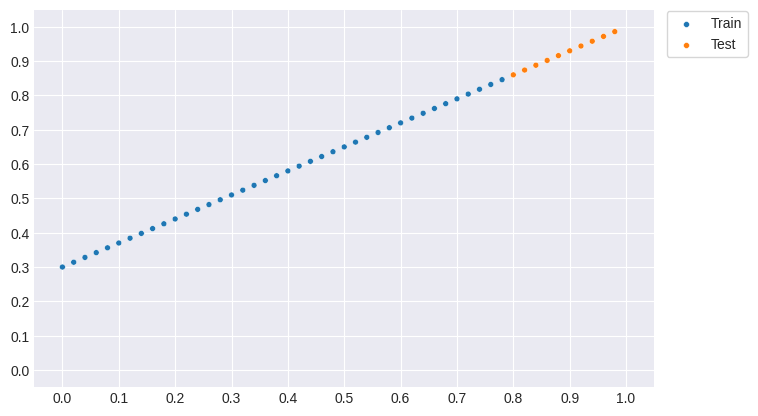

In [40]:
plot_data(X_train, y_train,
          X_test, y_test)

# Model

In [41]:
models = [None] * 10

## Linear regression

In [42]:
class LRModel(nn.Module):

    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias    = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    
    def forward(self, x: torch.tensor) -> torch.tensor:
        return self.weights * x + self.bias

In [58]:
torch.manual_seed(SEED)

models[0] = LRModel()

for p in models[0].parameters():
    print(p)

Parameter containing:
tensor([1.5840], requires_grad=True)
Parameter containing:
tensor([0.5977], requires_grad=True)


In [59]:
# https://pytorch.org/docs/stable/generated/torch.inference_mode.html
# "Code run under this mode gets better performance by disabling view tracking and version counter bumps."

with torch.inference_mode():
    y_pred = models[0](X_test)

y_pred.squeeze()

tensor([1.8649, 1.8965, 1.9282, 1.9599, 1.9916, 2.0233, 2.0549, 2.0866, 2.1183,
        2.1500])

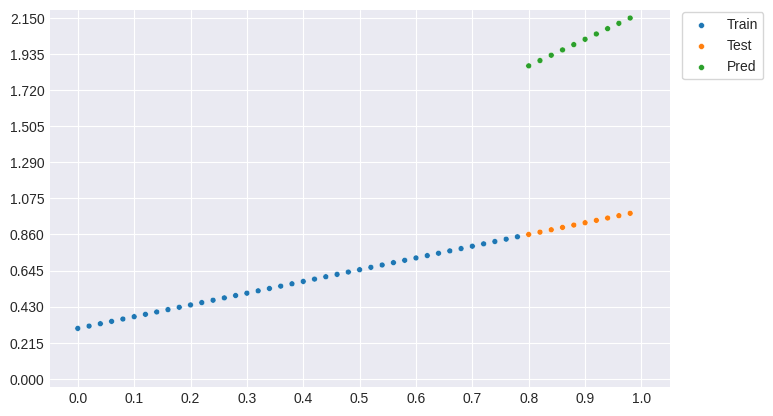

In [60]:
plot_data(X_train, y_train,
          X_test, y_test,
          X_test, y_pred)

In [61]:
loss_func = nn.L1Loss()
optimizer = torch.optim.SGD(params=models[0].parameters(), lr=0.01)

In [62]:
epochs = 1

for epoch in range(epochs):

    # Set the model to training mode (turn on required gradients)
    models[0].train()

    # 1. Forward pass
    y_pred = models[0](X_train)

    # 2. Calculate the loss
    loss = loss_func(y_pred, y_train)

    # 3. Zero grad of the optimizer (optimizer changes will acculumate through the loop)
    optimizer.zero_grad()

    # 4. Perform backpropagation (calculate gradients of each parameter)
    loss.backward()

    # 5. Progress the optimizer (perform gradient descent)
    optimizer.step()

    # Set the model to evaluation mode (turns off settings not needed for evaluation)
    models[0].eval()

In [63]:
models[0].state_dict()

OrderedDict([('weights', tensor([1.5801])), ('bias', tensor([0.5877]))])